## Code to plot Figure 4 and 5

## Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import datetime
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import cf 
import os
import cftime
import pickle
from matplotlib.gridspec import GridSpec
import matplotlib.colors as colors

## Functions

In [2]:
def calc_zonal_mean(data,ind_y1,ind_y2):
    temp = data.m01s51i001[ind_y1:ind_y2,:,:,:]
    time_mean = temp.mean(dim=['time'])
    weights = np.cos(np.deg2rad(time_mean.latitude))
    weights.name = "weights"
    temp_w = time_mean.weighted(weights)
    zonal_sum = temp_w.mean(dim=['longitude'])

    zonal_ppmv = zonal_sum * (28.97 / 48) * 1e6

    return zonal_ppmv

def calc_clim_mean_DU(data,ind_y1,ind_y2):
    # Slice year and pressure level
    # Year: 2000-2014
    # First model level = entire column of ozone
    clim = data.m01s50i219[ind_y1:ind_y2,0,:,:].groupby('time.month').mean('time')
    
    weights = np.cos(np.deg2rad(clim.latitude))
    weights.name = "weights"
    temp_w = clim.weighted(weights)
    climatology = temp_w.mean(dim=['longitude'])
    
    return climatology

## Read files

In [10]:
os.chdir('/gws/nopw/j04/vplume/mchim/netcdf_files/')

# Data for calculating zonal mean 
ukesm11_hist_presc = ['by791','bz502','bz897']

ukesm_ens1 = xr.open_dataset('u-by791_monthly_volc_ozonelev.nc')
ukesm_ens2 = xr.open_dataset('u-bz502_monthly_volc_ozonelev.nc')
ukesm_ens3 = xr.open_dataset('u-bz897_monthly_volc_ozonelev.nc')

# UKESM1.1 2000 to 2014 zonal mean
zonal_ens1 = calc_zonal_mean(ukesm_ens1, 1800,1980)
zonal_ens2 = calc_zonal_mean(ukesm_ens2, 1800,1980)
zonal_ens3 = calc_zonal_mean(ukesm_ens3, 1800,1980)

ensem_zonal = (zonal_ens1+zonal_ens2+zonal_ens3)/3

########################
# Data for calculating climatological mean 
ukesm_DU_ens1 = xr.open_dataset('Ozone_monthly/u-by791_monthly_volc_ozone.nc')
ukesm_DU_ens2 = xr.open_dataset('Ozone_monthly/u-bz502_monthly_volc_ozone.nc')
ukesm_DU_ens3 = xr.open_dataset('Ozone_monthly/u-bz897_monthly_volc_ozone.nc')

clim_DU_ens1 = calc_clim_mean_DU(ukesm_DU_ens1, 1800,1980)
clim_DU_ens2 = calc_clim_mean_DU(ukesm_DU_ens2, 1800,1980)
clim_DU_ens3 = calc_clim_mean_DU(ukesm_DU_ens3, 1800,1980)
ensem_DU_climatology = (clim_DU_ens1+clim_DU_ens2+clim_DU_ens3)/3

In [4]:
# Zonal mean values from Keeble et al 2021 (Figure 1)

cmip6_mmm = np.genfromtxt('CMIP6_MMM_figure1.csv', delimiter=',')
cmip6_mmm_lat = np.genfromtxt('CMIP6_MMM_figure1_lat.csv', delimiter=',')
cmip6_mmm_pres = np.genfromtxt('CMIP6_MMM_figure1_pres.csv', delimiter=',')

# Climatological mean from Keeble et al 2021 (Figure 3)
cmip6_mmm_clim = np.genfromtxt('CMIP6_MMM_figure3.csv', delimiter=',')
cmip6_mmm_clim_lat = np.genfromtxt('CMIP6_MMM_figure3_lat.csv', delimiter=',')

# Tomcat
tomcat_plev = xr.open_dataset('MLTOMCAT_1979_2020_72_plev_vmr.nc')

## Plots

In [9]:
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['legend.edgecolor']='black'
plt.rcParams['axes.linewidth']='0.8'
plt.rcParams['xtick.bottom']= 'True'
plt.rcParams['ytick.left']= 'True'
plt.rcParams['xtick.color']='black'
plt.rcParams['ytick.color']='black'
plt.rcParams['xtick.major.size']='3.5'
plt.rcParams['ytick.major.size']='3.5'
plt.rcParams['xtick.major.width']='0.8'
plt.rcParams['ytick.major.width']='0.8'

plt.rc('font', size=16)          # controls default text sizes          
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=16)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('figure', titlesize=20)   # fontsize of the figure title

### Figure 4

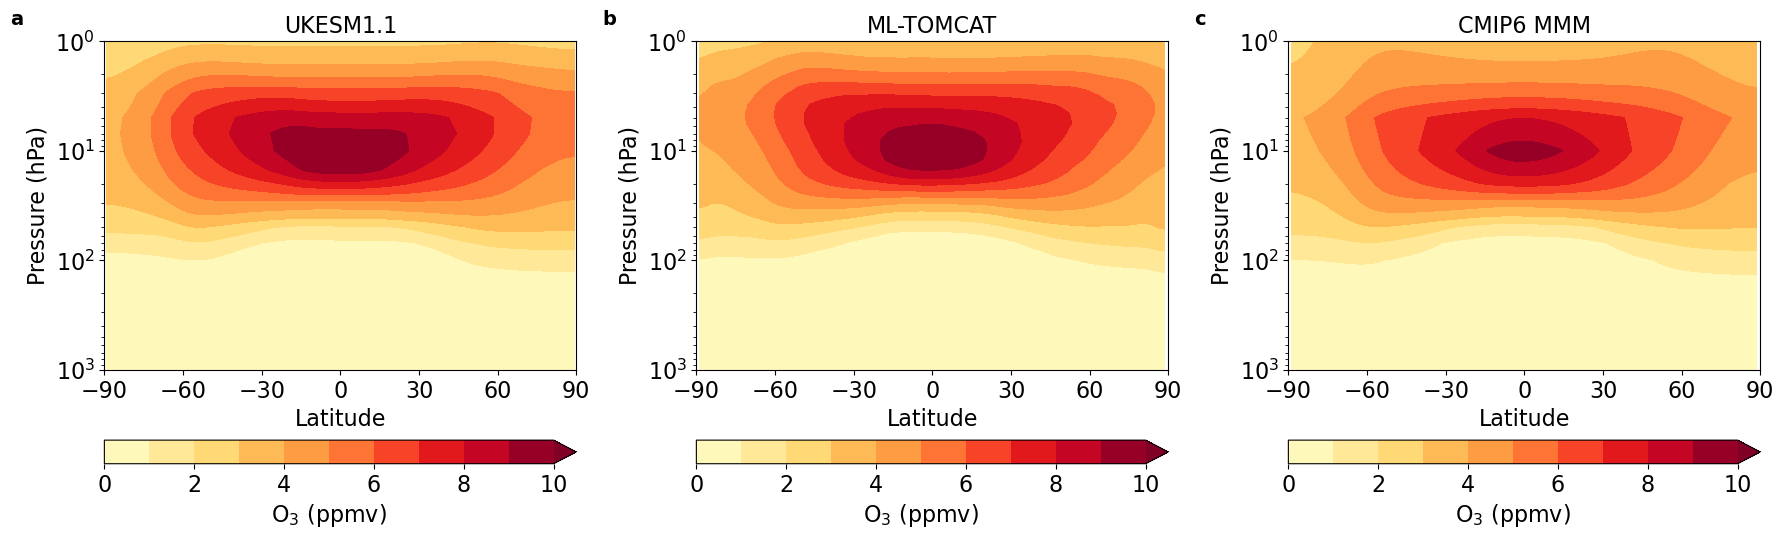

In [6]:
fig1, axes1 = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: UKESM1.1
ax1 = axes1[0]
ax1.text(-0.2, 1.05, 'a', transform=ax1.transAxes, fontsize=14, fontweight='bold')
latitudes = ensem_zonal.latitude
pressure_lev = ensem_zonal.pressure
X, Y = np.meshgrid(latitudes, pressure_lev)
levels = np.linspace(0, 10, 11)
contour1 = ax1.contourf(X, Y, ensem_zonal, levels=levels, cmap='YlOrRd', extend='max')
cbar1 = plt.colorbar(contour1, ax=ax1, label='O$_3$ (ppmv)', orientation='horizontal', pad=0.15)
ax1.set_title('UKESM1.1')
ax1.set_xlabel('Latitude')
ax1.set_xticks(np.arange(-90, 91, 30))
ax1.set_ylabel('Pressure (hPa)')
ax1.set_yscale('log')
ax1.invert_yaxis()
ax1.set_ylim(1000, 1)

# Plot 2: ML-TOMCAT
ax2 = axes1[1]
ax2.text(-0.2, 1.05, 'b', transform=ax2.transAxes, fontsize=14, fontweight='bold')
tomcat_sliced = tomcat_plev.O3[252:252+12*14,:,:,0].mean(dim=['time'])
latitudes = tomcat_sliced.lat
pressure_lev = tomcat_sliced.plev
X, Y = np.meshgrid(latitudes, pressure_lev)
levels = np.linspace(0, 10, 11)
contour2 = ax2.contourf(X, Y, tomcat_sliced, levels=levels, cmap='YlOrRd', extend='max')
cbar2 = plt.colorbar(contour2, ax=ax2, label='O$_3$ (ppmv)', orientation='horizontal', pad=0.15)
ax2.set_title('ML-TOMCAT')
ax2.set_xlabel('Latitude')
ax2.set_xticks(np.arange(-90, 91, 30))
ax2.set_ylabel('Pressure (hPa)')
ax2.set_yscale('log')
ax2.invert_yaxis()
ax2.set_ylim(1000, 1)

# Plot 3: CMIP6 MMM
ax3 = axes1[2]
ax3.text(-0.2, 1.05, 'c', transform=ax3.transAxes, fontsize=14, fontweight='bold')
X, Y = np.meshgrid(cmip6_mmm_lat, cmip6_mmm_pres)
levels = np.linspace(0, 10, 11)
contour3 = ax3.contourf(X, Y, cmip6_mmm, levels=levels, cmap='YlOrRd', extend='max')
cbar3 = plt.colorbar(contour3, ax=ax3, label='O$_3$ (ppmv)', orientation='horizontal', pad=0.15)
ax3.set_title('CMIP6 MMM')
ax3.set_xlabel('Latitude')
ax3.set_xticks(np.arange(-90, 91, 30))
ax3.set_ylabel('Pressure (hPa)')
ax3.set_yscale('log')
ax3.invert_yaxis()
ax3.set_ylim(1000, 1)

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

/tmp/ipykernel_5010/1013691567.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


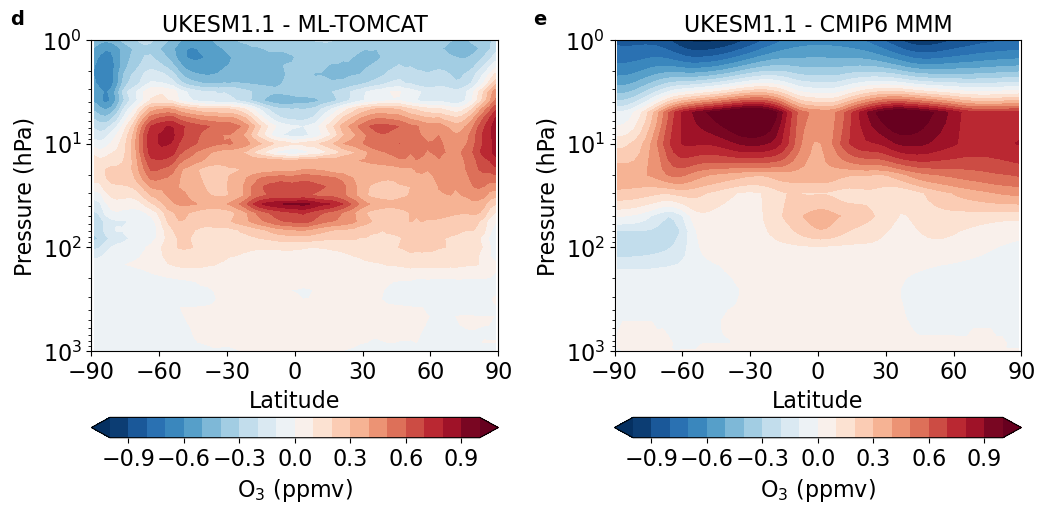

In [7]:
fig2 = plt.figure(figsize=(12, 6))
gs = GridSpec(1, 4, figure=fig2, wspace=0.8)

# Create centered subplots
ax4 = fig2.add_subplot(gs[0, 0:2])  # spans first 2 columns
ax5 = fig2.add_subplot(gs[0, 2:4])  # spans last 2 columns but same size

# Plot 4: UKESM1.1 - ML-TOMCAT difference
ax4.text(-0.2, 1.05, 'd', transform=ax4.transAxes, fontsize=14, fontweight='bold')
tomcat2_sliced = tomcat_sliced.rename({'lat': 'latitude', 'plev': 'pressure'})
target_lat = tomcat2_sliced['latitude']
target_plev = tomcat2_sliced['pressure']

# Interpolate both datasets
interpolated_data1 = ensem_zonal.interp(**{'latitude': target_lat, 'pressure': target_plev})
interpolated_data2 = tomcat2_sliced.interp(**{'latitude': target_lat, 'pressure': target_plev})

# Calculate difference
difference = interpolated_data1 - interpolated_data2
latitudes = difference.latitude
pressure_lev = difference.pressure
X, Y = np.meshgrid(latitudes, pressure_lev)
levels = np.linspace(-1, 1, 21)
contour4 = ax4.contourf(X, Y, difference, levels=levels, cmap='RdBu_r',
                       vmin=-1, vmax=1, extend='both')
cbar4 = plt.colorbar(contour4, ax=ax4, label='O$_3$ (ppmv)', orientation='horizontal', pad=0.15)
ax4.set_title('UKESM1.1 - ML-TOMCAT')
ax4.set_xlabel('Latitude')
ax4.set_xticks(np.arange(-90, 91, 30))
ax4.set_ylabel('Pressure (hPa)')
ax4.set_yscale('log')
ax4.invert_yaxis()
ax4.set_ylim(1000, 1)

# Plot 5: UKESM1.1 - CMIP6 MMM difference
ax5.text(-0.2, 1.05, 'e', transform=ax5.transAxes, fontsize=14, fontweight='bold')
df_cmip6_mmm = xr.DataArray(
    data=cmip6_mmm,
    dims=['pressure', 'latitude'],
    coords={
        'pressure': cmip6_mmm_pres,
        'latitude': cmip6_mmm_lat
    },
    name='Ozone mass mixing ratio',
    attrs={
        'pressure_units': 'hPa',
        'latitude_units': 'degrees_north'
    }
)
target_lat = df_cmip6_mmm.latitude
target_plev = df_cmip6_mmm.pressure

# Interpolate both datasets
interpolated_data1 = ensem_zonal.interp(**{'latitude': target_lat, 'pressure': target_plev})
interpolated_data2 = df_cmip6_mmm.interp(**{'latitude': target_lat, 'pressure': target_plev})

# Calculate difference
difference = interpolated_data1 - interpolated_data2
latitudes = difference.latitude
pressure_lev = difference.pressure
X, Y = np.meshgrid(latitudes, pressure_lev)
levels = np.linspace(-1, 1, 21)
contour5 = ax5.contourf(X, Y, difference, levels=levels, cmap='RdBu_r',
                       vmin=-1, vmax=1, extend='both')
cbar5 = plt.colorbar(contour5, ax=ax5, label='O$_3$ (ppmv)', orientation='horizontal', pad=0.15)
ax5.set_title('UKESM1.1 - CMIP6 MMM')
ax5.set_xlabel('Latitude')
ax5.set_xticks(np.arange(-90, 91, 30))
ax5.set_ylabel('Pressure (hPa)')
ax5.set_yscale('log')
ax5.invert_yaxis()
ax5.set_ylim(1000, 1)

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

### Figure 5

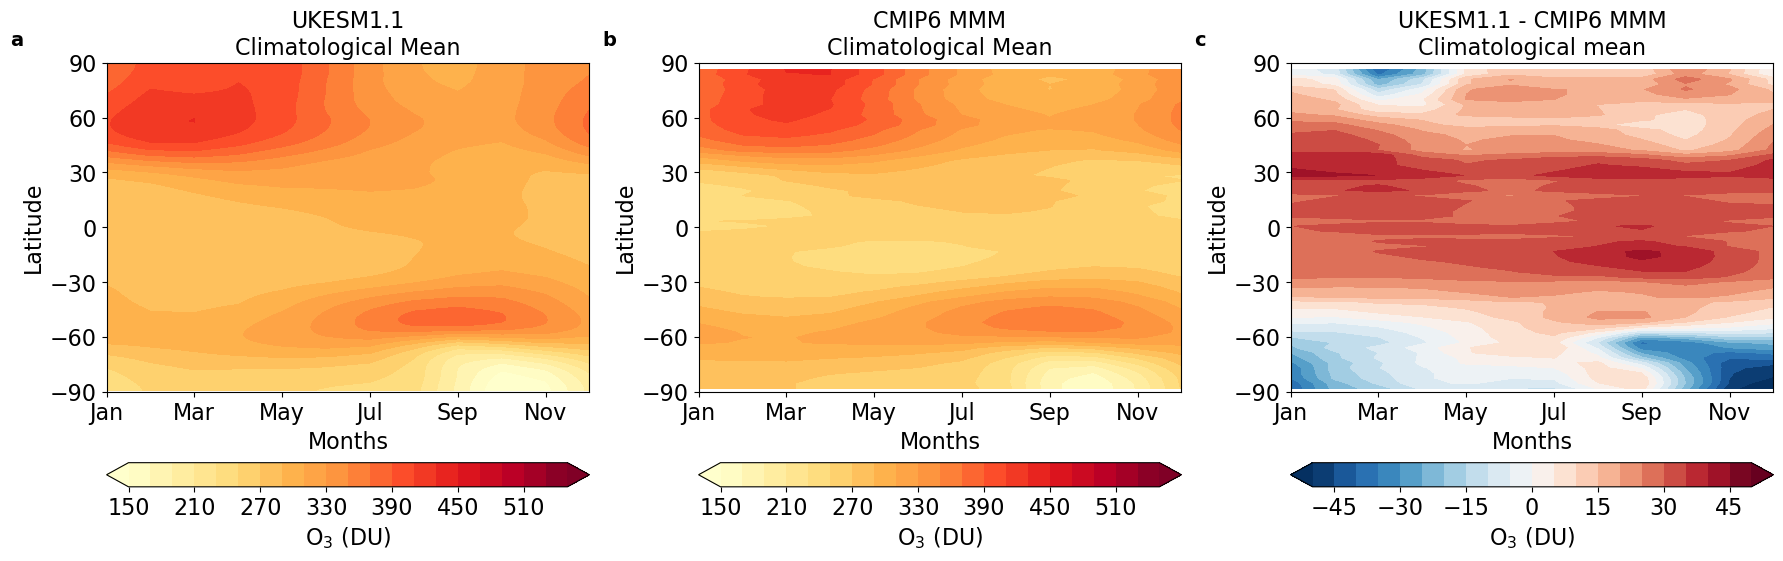

In [8]:
fig1, axes1 = plt.subplots(1, 3, figsize=(18, 6))


# Plot 1: UKESM1.1
ax2 = axes1[0]
ax2.text(-0.2, 1.05, 'a', transform=ax2.transAxes, fontsize=14, fontweight='bold')
latitudes = ensem_DU_climatology.latitude
months = ensem_DU_climatology.month
X, Y = np.meshgrid(months, latitudes)
levels = np.linspace(150, 550, 21)

contour2 = ax2.contourf(X, Y, ensem_DU_climatology.transpose(), levels=levels, cmap='YlOrRd', extend='both')
cbar2 = plt.colorbar(contour2, ax=ax2, label='O$_3$ (DU)', orientation='horizontal', pad=0.15)
ax2.set_title('UKESM1.1\nClimatological Mean')
ax2.set_xlabel('Months')
month_labels = ['Jan', 'Mar', 'May', 'Jul', 'Sep', 'Nov']
ax2.set_xticks(np.arange(1, 13, 2), month_labels)
ax2.set_ylabel('Latitude')
ax2.set_ylim(-87,87)
ax2.set_yticks(np.arange(-90, 91, 30))

# Plot 2: CMIP6 MMM
ax1 = axes1[1]
ax1.text(-0.2, 1.05, 'b', transform=ax1.transAxes, fontsize=14, fontweight='bold')
latitudes = cmip6_mmm_clim_lat
months = np.arange(1,13,1)
X, Y = np.meshgrid(months, latitudes)
levels = np.linspace(150, 550, 21)

contour = ax1.contourf(X, Y, cmip6_mmm_clim.transpose(), levels=levels, cmap='YlOrRd', extend='both')
cbar1 = plt.colorbar(contour, ax=ax1, label='O$_3$ (DU)', orientation='horizontal', pad=0.15)

ax1.set_title('CMIP6 MMM\nClimatological Mean')
ax1.set_xlabel('Months')
month_labels = ['Jan', 'Mar', 'May', 'Jul', 'Sep', 'Nov']
ax1.set_xticks(np.arange(1, 13, 2), month_labels)
ax1.set_ylabel('Latitude')
ax1.set_ylim(-87,87)
ax1.set_yticks(np.arange(-90, 91, 30))


# Plot 3: CMIP6 MMM
ax3 = axes1[2]
ax3.text(-0.2, 1.05, 'c', transform=ax3.transAxes, fontsize=14, fontweight='bold')

df_clim_cmip6 = xr.DataArray(
        data=cmip6_mmm_clim,
        dims=['month','latitude'],
        coords={
            'latitude': cmip6_mmm_clim_lat,
            'month': np.arange(1,13,1)
        },
        name='Ozone (DU)',
        attrs={
            'latitude': 'degrees_north',
            'month': 'time'
        }
    )
target_lat = df_clim_cmip6.latitude

# Interpolate both datasets
interpolated_data1 = ensem_DU_climatology.interp(**{'latitude': target_lat})
interpolated_data2 = df_clim_cmip6.interp(**{'latitude': target_lat})
    
# Calculate difference
difference = interpolated_data1 - interpolated_data2

latitudes = difference.latitude
month = np.arange(1,13,1)
X, Y = np.meshgrid(month, latitudes)
levels = np.linspace(-50, 50, 21)

contour3 = ax3.contourf(X, Y, difference.transpose(), levels=levels, cmap='RdBu_r',
                        vmin = -50, vmax = 50, extend='both')
bar3 = plt.colorbar(contour3, ax=ax3, label='O$_3$ (DU)', orientation='horizontal', pad=0.15)
ax3.set_title('UKESM1.1 - CMIP6 MMM\nClimatological mean')
ax3.set_xlabel('Months')
ax3.set_xticks(np.arange(1, 13, 2), month_labels)
ax3.set_xlim(1,12)
month_labels = ['Jan', 'Mar', 'May', 'Jul', 'Sep', 'Nov']
ax3.set_ylabel('Latitude')
ax3.set_ylim(-87,87)
ax3.set_yticks(np.arange(-90, 91, 30))

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()